# ai4 for health related matters

## dependencies

In [23]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

## dataset stuff

### read the dataset

In [24]:
df = pd.read_csv('dataset.csv')
df = df.sample(frac = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
263,44,1,3,120,226,0,0,169,0,0.0,1,0.0,3.0,0
92,62,1,3,130,231,0,0,146,0,1.8,2,3.0,7.0,0
75,65,0,3,160,360,0,2,151,0,0.8,1,0.0,3.0,0
77,51,0,3,140,308,0,2,142,0,1.5,1,1.0,3.0,0
172,59,0,4,174,249,0,0,143,1,0.0,2,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,41,1,2,110,235,0,0,153,0,0.0,1,0.0,3.0,0
174,64,1,4,145,212,0,2,132,0,2.0,2,2.0,6.0,4
65,60,1,4,145,282,0,2,142,1,2.8,2,2.0,7.0,2
218,64,0,4,130,303,0,0,122,0,2.0,2,2.0,3.0,0


### train_test split

In [25]:
ratio = 0.9 # 90:10 train:test ratio
train_set = df.sample(frac=ratio)

# Dropping all those indexes from the dataframe that exists in the train_set
test_set = df.drop(train_set.index)
train_set.shape, test_set.shape

train_set
test_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
92,62,1,3,130,231,0,0,146,0,1.8,2,3.0,7.0,0
41,40,1,1,140,199,0,0,178,1,1.4,1,0.0,7.0,0
294,63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,1
213,66,0,4,178,228,1,0,165,1,1.0,2,2.0,7.0,3
282,55,0,4,128,205,0,1,130,1,2.0,2,1.0,7.0,3
113,43,0,4,132,341,1,2,136,1,3.0,2,0.0,7.0,2
212,41,1,3,130,214,0,2,168,0,2.0,2,0.0,3.0,0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
63,54,0,3,135,304,1,0,170,0,0.0,1,0.0,3.0,0
97,60,0,4,150,258,0,2,157,0,2.6,2,2.0,7.0,3


### formating

In [26]:
# import training dataset

# Clean column names
train_set.columns = train_set.columns.str.strip()

# Handle missing values represented by '?'
train_set = train_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
train_set = train_set.dropna()
train_set = train_set.astype(float)

# Split features and labels
X = train_set.drop("diagnosis", axis=1)
y = train_set["diagnosis"]

y = (y > 0.5).astype(float)  # Ensures only 0 or 1

# normalise featuress from minmax scaling (sklearn)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
inputs = torch.tensor(X_scaled, dtype=torch.float32)
targets = torch.tensor(y.values, dtype=torch.float32)

print(inputs.shape, targets.shape)

torch.Size([267, 13]) torch.Size([267])


In [64]:
# import training dataset

# Clean column names
test_set.columns = test_set.columns.str.strip()

# Handle missing values represented by '?'
test_set = test_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
test_set = test_set.dropna()
test_set = test_set.astype(float)

# Split features and labels
X = test_set.drop("diagnosis", axis=1)
y = test_set["diagnosis"]

y = (y > 0.5).astype(float)  # Ensures only 0 or 1

# normalise featuress from minmax scaling (sklearn)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
test_inputs = torch.tensor(X_scaled, dtype=torch.float32)
test_targets = torch.tensor(y.values, dtype=torch.float32)

print(test_inputs.shape, test_targets.shape)

torch.Size([30, 13]) torch.Size([30])


## AI1

### setup/params

In [28]:
class SimpleNN(nn.Module): 
    def __init__(self): 
        super(SimpleNN, self).__init__() 
        self.fc1 = nn.Linear(13, 26)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(26, 1)
        
    def forward(self, x): 
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x  # No sigmoid here; use BCEWithLogitsLoss

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=26, out_features=1, bias=True)
)


### error calcs.

In [29]:
#calculate error
# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

# Ensure targets are shape (N, 1)
targets = targets.view(-1, 1)
print(targets)

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
      

### training

In [30]:
# learning rate and epochs
epochs = 10000
lr = 0.005

Epoch [1/10000], Loss: 0.6856
Epoch [2/10000], Loss: 0.6855
Epoch [3/10000], Loss: 0.6853
Epoch [4/10000], Loss: 0.6852
Epoch [5/10000], Loss: 0.6850
Epoch [6/10000], Loss: 0.6849
Epoch [7/10000], Loss: 0.6847
Epoch [8/10000], Loss: 0.6845
Epoch [9/10000], Loss: 0.6844
Epoch [10/10000], Loss: 0.6842
Epoch [11/10000], Loss: 0.6841
Epoch [12/10000], Loss: 0.6839
Epoch [13/10000], Loss: 0.6838
Epoch [14/10000], Loss: 0.6836
Epoch [15/10000], Loss: 0.6834
Epoch [16/10000], Loss: 0.6833
Epoch [17/10000], Loss: 0.6831
Epoch [18/10000], Loss: 0.6830
Epoch [19/10000], Loss: 0.6828
Epoch [20/10000], Loss: 0.6827
Epoch [21/10000], Loss: 0.6825
Epoch [22/10000], Loss: 0.6824
Epoch [23/10000], Loss: 0.6822
Epoch [24/10000], Loss: 0.6820
Epoch [25/10000], Loss: 0.6819
Epoch [26/10000], Loss: 0.6817
Epoch [27/10000], Loss: 0.6816
Epoch [28/10000], Loss: 0.6814
Epoch [29/10000], Loss: 0.6813
Epoch [30/10000], Loss: 0.6811
Epoch [31/10000], Loss: 0.6810
Epoch [32/10000], Loss: 0.6808
Epoch [33/10000],

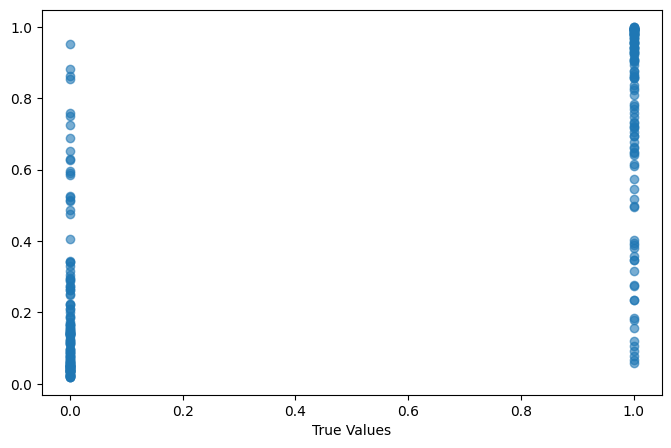

In [31]:
for epoch in range(epochs):
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    if torch.isnan(loss):
        print("Loss is NaN!")
        break
    loss.backward()
    optimiser.step()
#    if (epoch + 1) % 500 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
print(outputs)

# Evaluate on training set
with torch.no_grad():
    outputs = model(inputs)
    preds = torch.sigmoid(outputs)
    predicted_classes = (preds > 0.5).float()
    accuracy1 = (predicted_classes == targets).float().mean()
    print(f"Training Accuracy: {accuracy1.item()*100:.2f}%")

    # Plot predictions vs. true values
    plt.figure(figsize=(8, 5))
    plt.scatter(targets.numpy(), preds.numpy(), alpha=0.6)
    plt.xlabel("True Values")

### testing

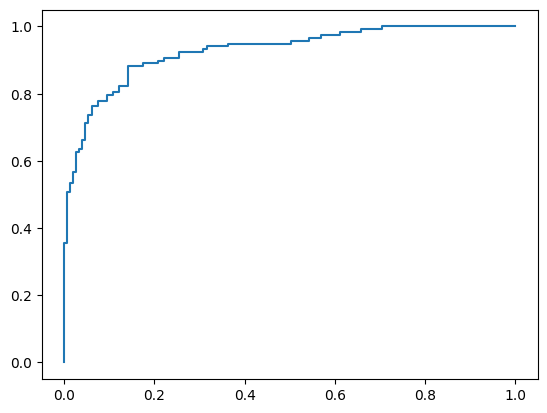

In [32]:
# roc curve
fpr1, tpr1, _ = roc_curve(targets.numpy(), preds.numpy())
plt.plot(fpr1, tpr1, label = "ROC Curve")

## AI2

### setup/params.

In [33]:
class SimpleNN(nn.Module): 
    def __init__(self): 
        super(SimpleNN, self).__init__() 
        self.fc1 = nn.Linear(13, 26)
        self.celu = nn.CELU()
        self.fc2 = nn.Linear(26, 32)
        self.rrelu2 = nn.RReLU()
        self.fc3 = nn.Linear(32, 100)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(100, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 1) #output layer
        
    def forward(self, x): 
        x = self.fc1(x)
        x = self.celu(x)
        x = self.fc2(x)
        x = self.rrelu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        return x  # No sigmoid here; use BCEWithLogitsLoss

model = SimpleNN()
model

SimpleNN(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (celu): CELU(alpha=1.0)
  (fc2): Linear(in_features=26, out_features=32, bias=True)
  (rrelu2): RReLU(lower=0.125, upper=0.3333333333333333)
  (fc3): Linear(in_features=32, out_features=100, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=100, out_features=64, bias=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=64, out_features=1, bias=True)
)

### error calcs.

In [34]:
#calculate error
# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

# Ensure targets are shape (N, 1)
targets = targets.view(-1, 1)
print(targets)

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
      

### training

In [35]:
# learning rate and epochs (variables)
epochs = 30000
lr = 0.05

Epoch [1/30000], Loss: 0.6924
Epoch [2/30000], Loss: 0.6923
Epoch [3/30000], Loss: 0.6923
Epoch [4/30000], Loss: 0.6921
Epoch [5/30000], Loss: 0.6921
Epoch [6/30000], Loss: 0.6921
Epoch [7/30000], Loss: 0.6920
Epoch [8/30000], Loss: 0.6919
Epoch [9/30000], Loss: 0.6919
Epoch [10/30000], Loss: 0.6918
Epoch [11/30000], Loss: 0.6917
Epoch [12/30000], Loss: 0.6917
Epoch [13/30000], Loss: 0.6915
Epoch [14/30000], Loss: 0.6915
Epoch [15/30000], Loss: 0.6915
Epoch [16/30000], Loss: 0.6914
Epoch [17/30000], Loss: 0.6913
Epoch [18/30000], Loss: 0.6912
Epoch [19/30000], Loss: 0.6913
Epoch [20/30000], Loss: 0.6912
Epoch [21/30000], Loss: 0.6911
Epoch [22/30000], Loss: 0.6910
Epoch [23/30000], Loss: 0.6910
Epoch [24/30000], Loss: 0.6909
Epoch [25/30000], Loss: 0.6909
Epoch [26/30000], Loss: 0.6908
Epoch [27/30000], Loss: 0.6907
Epoch [28/30000], Loss: 0.6907
Epoch [29/30000], Loss: 0.6907
Epoch [30/30000], Loss: 0.6906
Epoch [31/30000], Loss: 0.6905
Epoch [32/30000], Loss: 0.6904
Epoch [33/30000],

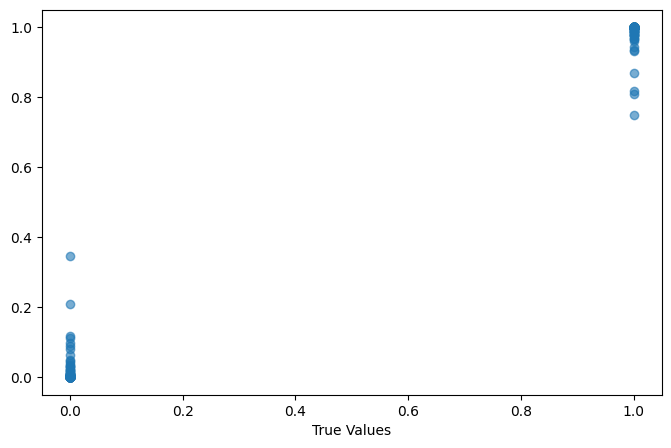

In [36]:
for epoch in range(epochs):
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    if torch.isnan(loss):
        print("Loss is NaN!")
        break
    loss.backward()
    optimiser.step()
#    if (epoch + 1) % 500 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
print(outputs)

# Evaluate on training set
with torch.no_grad():
    outputs = model(inputs)
    preds = torch.sigmoid(outputs)
    predicted_classes = (preds > 0.5).float()
    accuracy2 = (predicted_classes == targets).float().mean()
    print(f"Training Accuracy: {accuracy2.item()*100:.2f}%")

    # Plot predictions vs. true values
    plt.figure(figsize=(8, 5))
    plt.scatter(targets.numpy(), preds.numpy(), alpha=0.6)
    plt.xlabel("True Values")

### testing

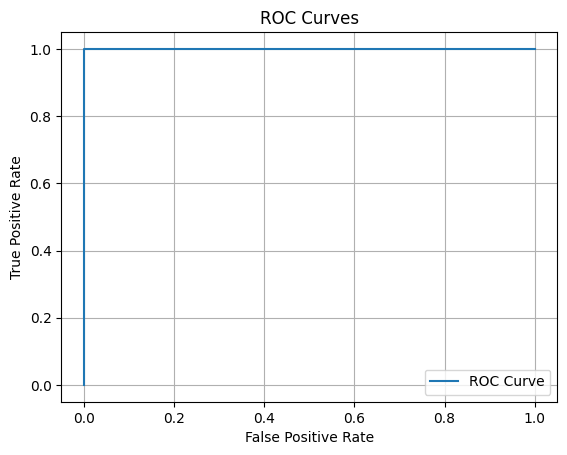

In [37]:
# roc curve
fpr2, tpr2, _ = roc_curve(targets.numpy(), preds.numpy())
plt.plot(fpr2, tpr2, label = "ROC Curve")
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

## AI3

### setup/params

In [38]:
class SimpleNN(nn.Module): 
    def __init__(self): 
        super(SimpleNN, self).__init__() 
        self.fc1 = nn.Linear(13, 26)
        self.rrelu = nn.RReLU()
        self.fc2 = nn.Linear(26, 26)
        self.silu2 = nn.SiLU()
        self.fc3 = nn.Linear(26, 1)


    def forward(self, x): 
        x = self.fc1(x)
        x = self.rrelu(x)
        x = self.fc2(x)
        x = self.silu2(x)
        x = self.fc3(x)
        return x  # No sigmoid here; use BCEWithLogitsLoss

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (rrelu): RReLU(lower=0.125, upper=0.3333333333333333)
  (fc2): Linear(in_features=26, out_features=26, bias=True)
  (silu2): SiLU()
  (fc3): Linear(in_features=26, out_features=1, bias=True)
)


### error calcs.

In [39]:
#calculate error
# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

# Ensure targets are shape (N, 1)
targets = targets.view(-1, 1)
print(targets)

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
      

### training

In [40]:
# learning rate and epochs
epochs = 10000
lr = 0.005

Epoch [1/10000], Loss: 0.3329
Epoch [2/10000], Loss: 0.3326
Epoch [3/10000], Loss: 0.3322
Epoch [4/10000], Loss: 0.3323
Epoch [5/10000], Loss: 0.3326
Epoch [6/10000], Loss: 0.3323
Epoch [7/10000], Loss: 0.3338
Epoch [8/10000], Loss: 0.3331
Epoch [9/10000], Loss: 0.3331
Epoch [10/10000], Loss: 0.3337
Epoch [11/10000], Loss: 0.3326
Epoch [12/10000], Loss: 0.3330
Epoch [13/10000], Loss: 0.3337
Epoch [14/10000], Loss: 0.3319
Epoch [15/10000], Loss: 0.3329
Epoch [16/10000], Loss: 0.3332
Epoch [17/10000], Loss: 0.3330
Epoch [18/10000], Loss: 0.3320
Epoch [19/10000], Loss: 0.3330
Epoch [20/10000], Loss: 0.3320
Epoch [21/10000], Loss: 0.3324
Epoch [22/10000], Loss: 0.3322
Epoch [23/10000], Loss: 0.3323
Epoch [24/10000], Loss: 0.3324
Epoch [25/10000], Loss: 0.3322
Epoch [26/10000], Loss: 0.3322
Epoch [27/10000], Loss: 0.3322
Epoch [28/10000], Loss: 0.3324
Epoch [29/10000], Loss: 0.3326
Epoch [30/10000], Loss: 0.3322
Epoch [31/10000], Loss: 0.3316
Epoch [32/10000], Loss: 0.3325
Epoch [33/10000],

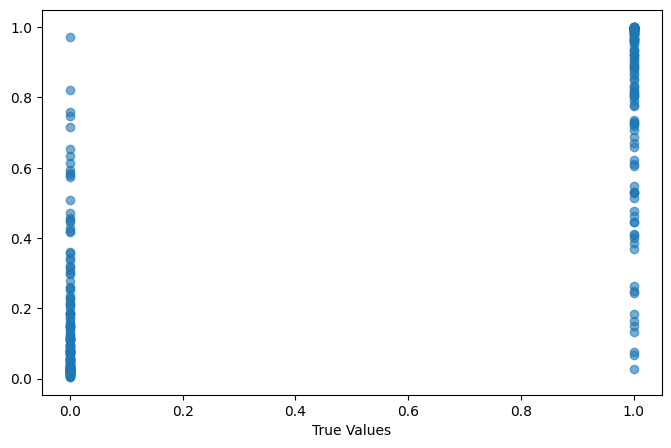

In [45]:
for epoch in range(epochs):
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    if torch.isnan(loss):
        print("Loss is NaN!")
        break
    loss.backward()
    optimiser.step()
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
print(outputs)

# Evaluate on training set
with torch.no_grad():
    outputs = model(inputs)
    preds = torch.sigmoid(outputs)
    predicted_classes = (preds > 0.5).float()
    accuracy3 = (predicted_classes == targets).float().mean()
    print(f"Training Accuracy: {accuracy3.item()*100:.2f}%")

    # Plot predictions vs. true values
    plt.figure(figsize=(8, 5))
    plt.scatter(targets.numpy(), preds.numpy(), alpha=0.6)
    plt.xlabel("True Values")

### testing

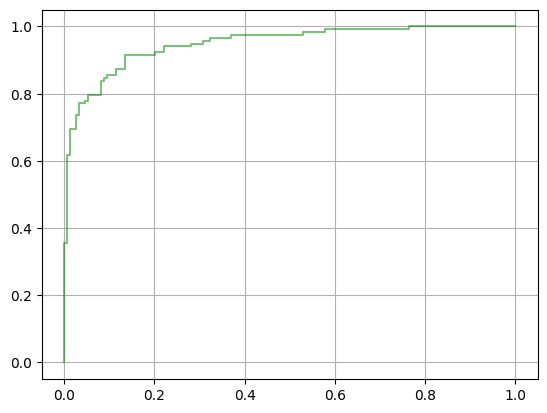

In [60]:
# roc curve
fpr3, tpr3, _ = roc_curve(targets.numpy(), preds.numpy())
plt.plot(fpr3, tpr3, label = "ROC Curve", color = "green", alpha=0.5)
plt.grid(True)

In [ ]:
test = torch.sigmoid(model(test_inputs))


tensor([[0.9984],
        [0.5196],
        [0.1041],
        [0.9935],
        [0.9328],
        [0.8203],
        [0.3472],
        [0.9555],
        [0.0089],
        [0.9874],
        [0.9993],
        [0.9737],
        [0.1941],
        [0.0084],
        [0.9389],
        [0.6485],
        [0.1784],
        [0.0143],
        [0.9983],
        [0.9996],
        [0.8733],
        [0.9818],
        [0.9947],
        [0.0086],
        [0.2945],
        [0.4559],
        [0.0489],
        [0.9502],
        [0.9236],
        [0.9998]], grad_fn=<SigmoidBackward0>)

## comparison

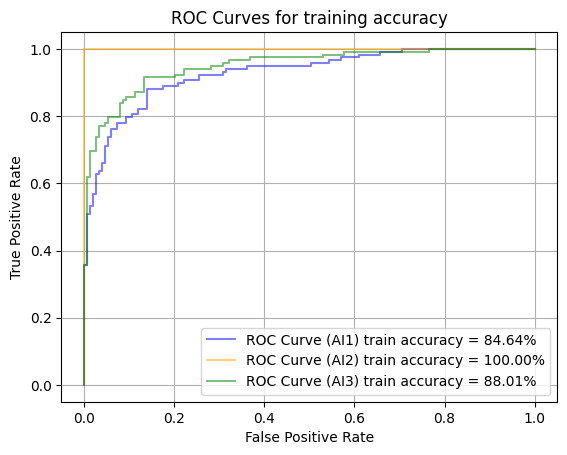

In [ ]:
# roc curve
plt.plot(fpr1, tpr1, label = f"ROC Curve (AI1) train accuracy = {accuracy1.item()*100:.2f}%", c="blue", alpha=0.5) #blue
plt.plot(fpr2, tpr2, label = f"ROC Curve (AI2) train accuracy = {accuracy2.item()*100:.2f}%", c="orange", alpha=0.5) #orange
plt.plot(fpr3, tpr3, label = f"ROC Curve (AI3) train accuracy = {accuracy3.item()*100:.2f}%", c="green", alpha=0.5) #green
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for training accuracy")
plt.legend()